This is an algorith written to classify handwritten digits for the mnist dataset .
I have written classifier algorithm from scratch.
Euledian distance is used to find the distance between two points.

1)Calculation of Euclidean distance
Euclidean distance is the square root of the sum of squared distance between two points.
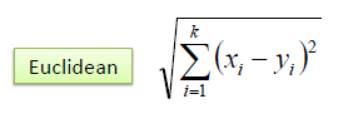
Two points are passed .
The Euclidean _distance function calculates the difference between the squares of the points and finally the square root of the difference .

In [19]:
def Euclidean_distance(test_data, train_data):
    distance = 0
    for i in range(len(test_data)):
        distance += (test_data[i]-train_data[i])**2
    return sqrt(distance)

2)Get the k nearest neighbors after sorting distance
In order to find the neighbors we need to first sort the distance in ascending order,np.argsort () is used to find the index of minimum distance .
After that we will arrange the data according to the sorted index.
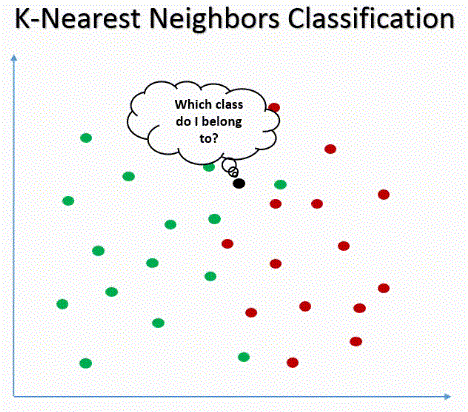

In [22]:
def Get_Neighbors(train_data, test_data, train_target):
    distance = list() # []
    
    for i in train_data:
        dist = Euclidean_distance(test_data, i)
        distance.append(dist)

    distance = np.array(distance)
    
    #Finding the index in ascending order
    index_dist = distance.argsort()

    #Arranging data according to index
    target = train_target[index_dist]    

    return target

3)Predicting the class of the new data point
The test data will present in the class with majority of the votes .So,to find that we will use max () function
They key in the max function groups the neighbors wrt to their classes and .count will count the number of neighbors in each class.
Finally max returns the class with majority votes which will be the predicted class of the test data.

In [14]:
def predict_classification(train_data, test_data, train_target, k):
    target = Get_Neighbors(train_data, test_data, train_target)
    Neighbors=[]
    for i in range(k):
        Neighbors.append(target[i])

    prediction = max(Neighbors, key= Neighbors.count)
    return prediction

4)Accuracy calculation
Accuracy shows how close the measured value to the true value.
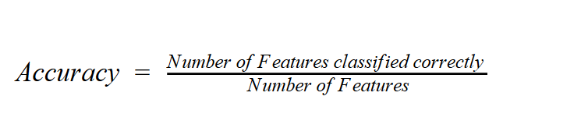
Accuracy is calculated by dividing the correctly classified samples count by total samples.
Higher the accuracy ,more efficient the model .

In [15]:
def accuracy(test_target,predicted_target):
    n_correct = 0
    for i in range(len(test_target)):
        if test_target[i] == predicted_target[i]:
            n_correct += 1
    acc = n_correct/len(test_target)
    return acc*100

Import the libraries
First ,we will import all the modules that are useful for the model training.
Sklearn library already contains some datasets and MNIST is one of them.So,importing the dataset is very easy.

In [7]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from math import sqrt
from sklearn.model_selection import train_test_split

2. Loading the dataset
we can use a small handwritten data set like load_digits

In [8]:
dataset = load_digits() #load_digits()
data = dataset.data 
target = dataset.target
images = dataset.images

5.Prediction of the model
we are slicing the data.
Predict using the prediction function defined with k value.
Return prediction

In [9]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2) #This will return a kind of an array or list.
k=5


4.Visualization of data
Visualization requires reshaping of 64 columns into 8*8 pixel image
For plotting, we use plt.imshow() from matplotlib library.

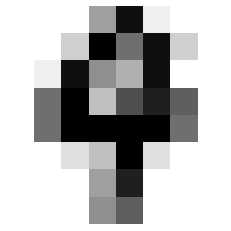

In [18]:
some_digit = test_data[0]
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [17]:
k=5
received_target = predict_classification(train_data, test_data[0],train_target, k)
print(received_target)

4


In [23]:
predicted_target=[]
for i in range(len(test_data)):
    received_target = predict_classification(train_data, test_data[i],train_target, k)
    predicted_target.append(received_target)
print(len(test_target))
print(len(predicted_target))
accuracy_score = accuracy(test_target,predicted_target)
print('Received %2f'  %accuracy_score, "% accuracy" )

360
360
Received 98.888889 % accuracy
